Notebook to investigate how the IRFs change with different parameter values

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os

from HANKStickyModel import HANKStickyModelClass

# Settings

In [2]:
savefolder = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + 'saved_models')
path_images = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + 'images' + os.sep + 'parameter_sensitivity')

# Solve the models

## baseline


In [6]:
model_base = HANKStickyModelClass(name='baseline', par={'phi_K': 9.0}, savefolder=savefolder)
model_base.find_ss(do_print=True)
model_base.compute_jacs(do_print=True)
model_base.find_transition_path(do_print=True, do_print_unknowns=True)
model_base.find_IRFs(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 5.5 secs [757 iterations]
household problem in ss simulated in 1.1 secs [515 iterations]
steady state found in 1.0 mins 5 secs
 beta   = 0.9951
 nu     = 0.6763
Discrepancy in C =          nan
Discrepancy in L =  -0.00000000
Discrepancy in Y =  -0.00000000
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 3.6 secs
curly_Y and curly_D calculated for ra              in 4.2 secs
curly_Y and curly_D calculated for rl              in 3.8 secs
curly_E calculated in 3.9 secs
builiding blocks combined in 0.7 secs
household Jacobian computed in 16.1 secs

full Jacobians:
full Jacobian to unknowns computed in 14.7 secs [in evaluate_path(): 10.2 secs]
full Jacobian to shocks computed in 3.5 secs [in evaluate_path(): 0.2 secs]
finding the transition path:
 it =   0 -> max. abs. error = 4.29e-04
   r              : minval =   0

In [3]:
paths = ['G','Y','C_hh','K','I',
         'N','w','tau','Pi','Pi_w','i','s','s_w','Z',
         'L_hh','A_hh',
         'rk','r','ra','rl',
         'q','B',
         'p_eq','Div','p_int','Div_int','p_k','Div_k']
lvl_value = ['eg', 'em', 'ez', 'i', 'Pi', 'Pi_w','clearing_Y','clearing_A', 'clearing_L', 'clearing_fund_start', 'clearing_fund_end']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}

In [4]:
def solution_routine(compare_models, load_models=[], save_models=[]):
    # init container for models
    models_solved = {}
    models_solved['baseline'] = model_base
    for m in compare_models:
        if  m in load_models:
            assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
            print(f'Model: {m}')
            models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
            models_solved[m].load()
            print('model loaded')
        else:
            # init model
            print(f'Model: {m}')
            models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
            # solve model
            models_solved[m].find_ss(do_print=False)
            models_solved[m].compute_jacs(do_print=False)
            models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
            models_solved[m].find_IRFs(do_print=False)
            if m in save_models:
                models_solved[m].save()
                print(f'saved')
            print(f'solved')
    return models_solved

## Investment adjustment costs

In [5]:
models = {
    'invest_adjust_50': {      # this is the baseline model
        'update_par': {
            'phi_K': 50
        },
    },
    'invest_adjust_9': {      # this is the baseline model
        'update_par': {
            'phi_K': 9
        },
    },
    'invest_adjust_5': {      # this is the baseline model
            'update_par': {
                'phi_K': 5
            },
    },
    'invest_adjust_20': {      # this is the baseline model
            'update_par': {
                'phi_K': 20
            },
    }
}

# investment ajdustment cost parameter

In [6]:
compare_models = ['invest_adjust_5', 'invest_adjust_9', 'invest_adjust_20', 'invest_adjust_50']
labels = [f'$\phi_K = 5$', f'$\phi_K = 9$', f'$\phi_K = 20$', f'$\phi_K = 50$']
load_models = []
save_models = []

In [13]:
models_solved = solution_routine(compare_models)

Model: invest_adjust_5
B: terminal value is   0.08502779, but ss value is   0.08503087
Div_int: terminal value is   0.05744555, but ss value is   0.05743406
Div_k: terminal value is   0.10946422, but ss value is   0.10946833
Div: terminal value is   0.16690977, but ss value is   0.16690239
i: terminal value is   0.01226286, but ss value is   0.01227223
I: terminal value is   0.11819337, but ss value is   0.11819000
Ip: terminal value is   0.11819170, but ss value is   0.11819000
K: terminal value is   8.92043945, but ss value is   8.92000000
L: terminal value is   0.00000000, but ss value is   0.92000000
Pi_increase: terminal value is  -0.00000002, but ss value is   0.00000000
Pi_w_increase: terminal value is  -0.00000015, but ss value is   0.00000000
Pi_w: terminal value is  -0.00000840, but ss value is   0.00000000
Pi: terminal value is  -0.00000827, but ss value is   0.00000000
qB: terminal value is   1.67995476, but ss value is   1.68000000
r: terminal value is   0.01226286, but ss

### varnames ###


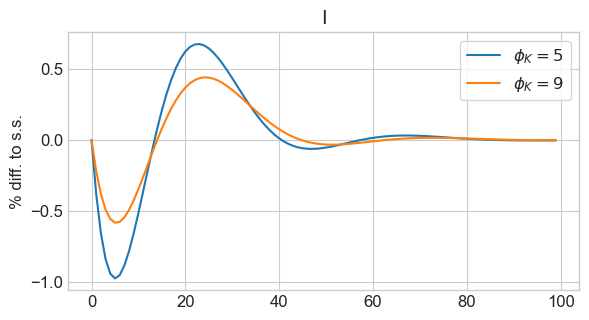

In [9]:
models_list = []
compare_models = ['invest_adjust_5', 'invest_adjust_9']
labels = [f'$\phi_K = 5$', f'$\phi_K = 9$']
filename = os.path.join(path_images, 'inv_adj_costs')
for m in compare_models:
    models_list.append(models_solved[m])
    paths_I = ['I']
models_solved['baseline'].compare_IRFs(models_list, labels, paths_I, do_shocks=False, do_targets=False, ncols=3,T_max=100, filename=filename)

The higher adjustment costs make investment less volatile.

### shocks ###


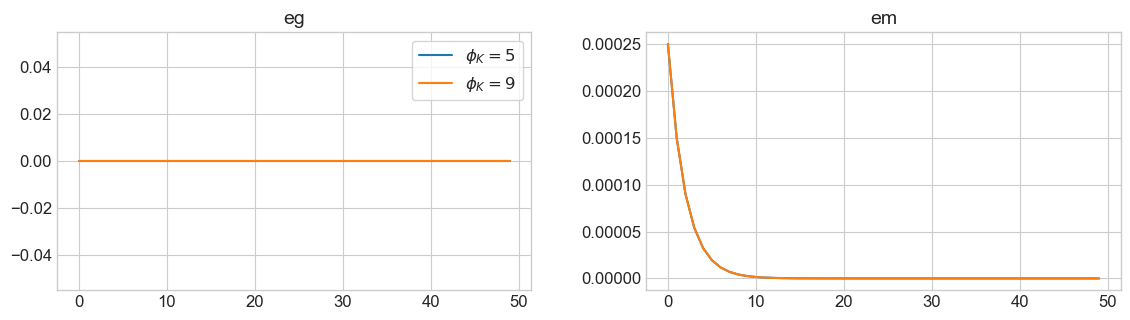


### varnames ###


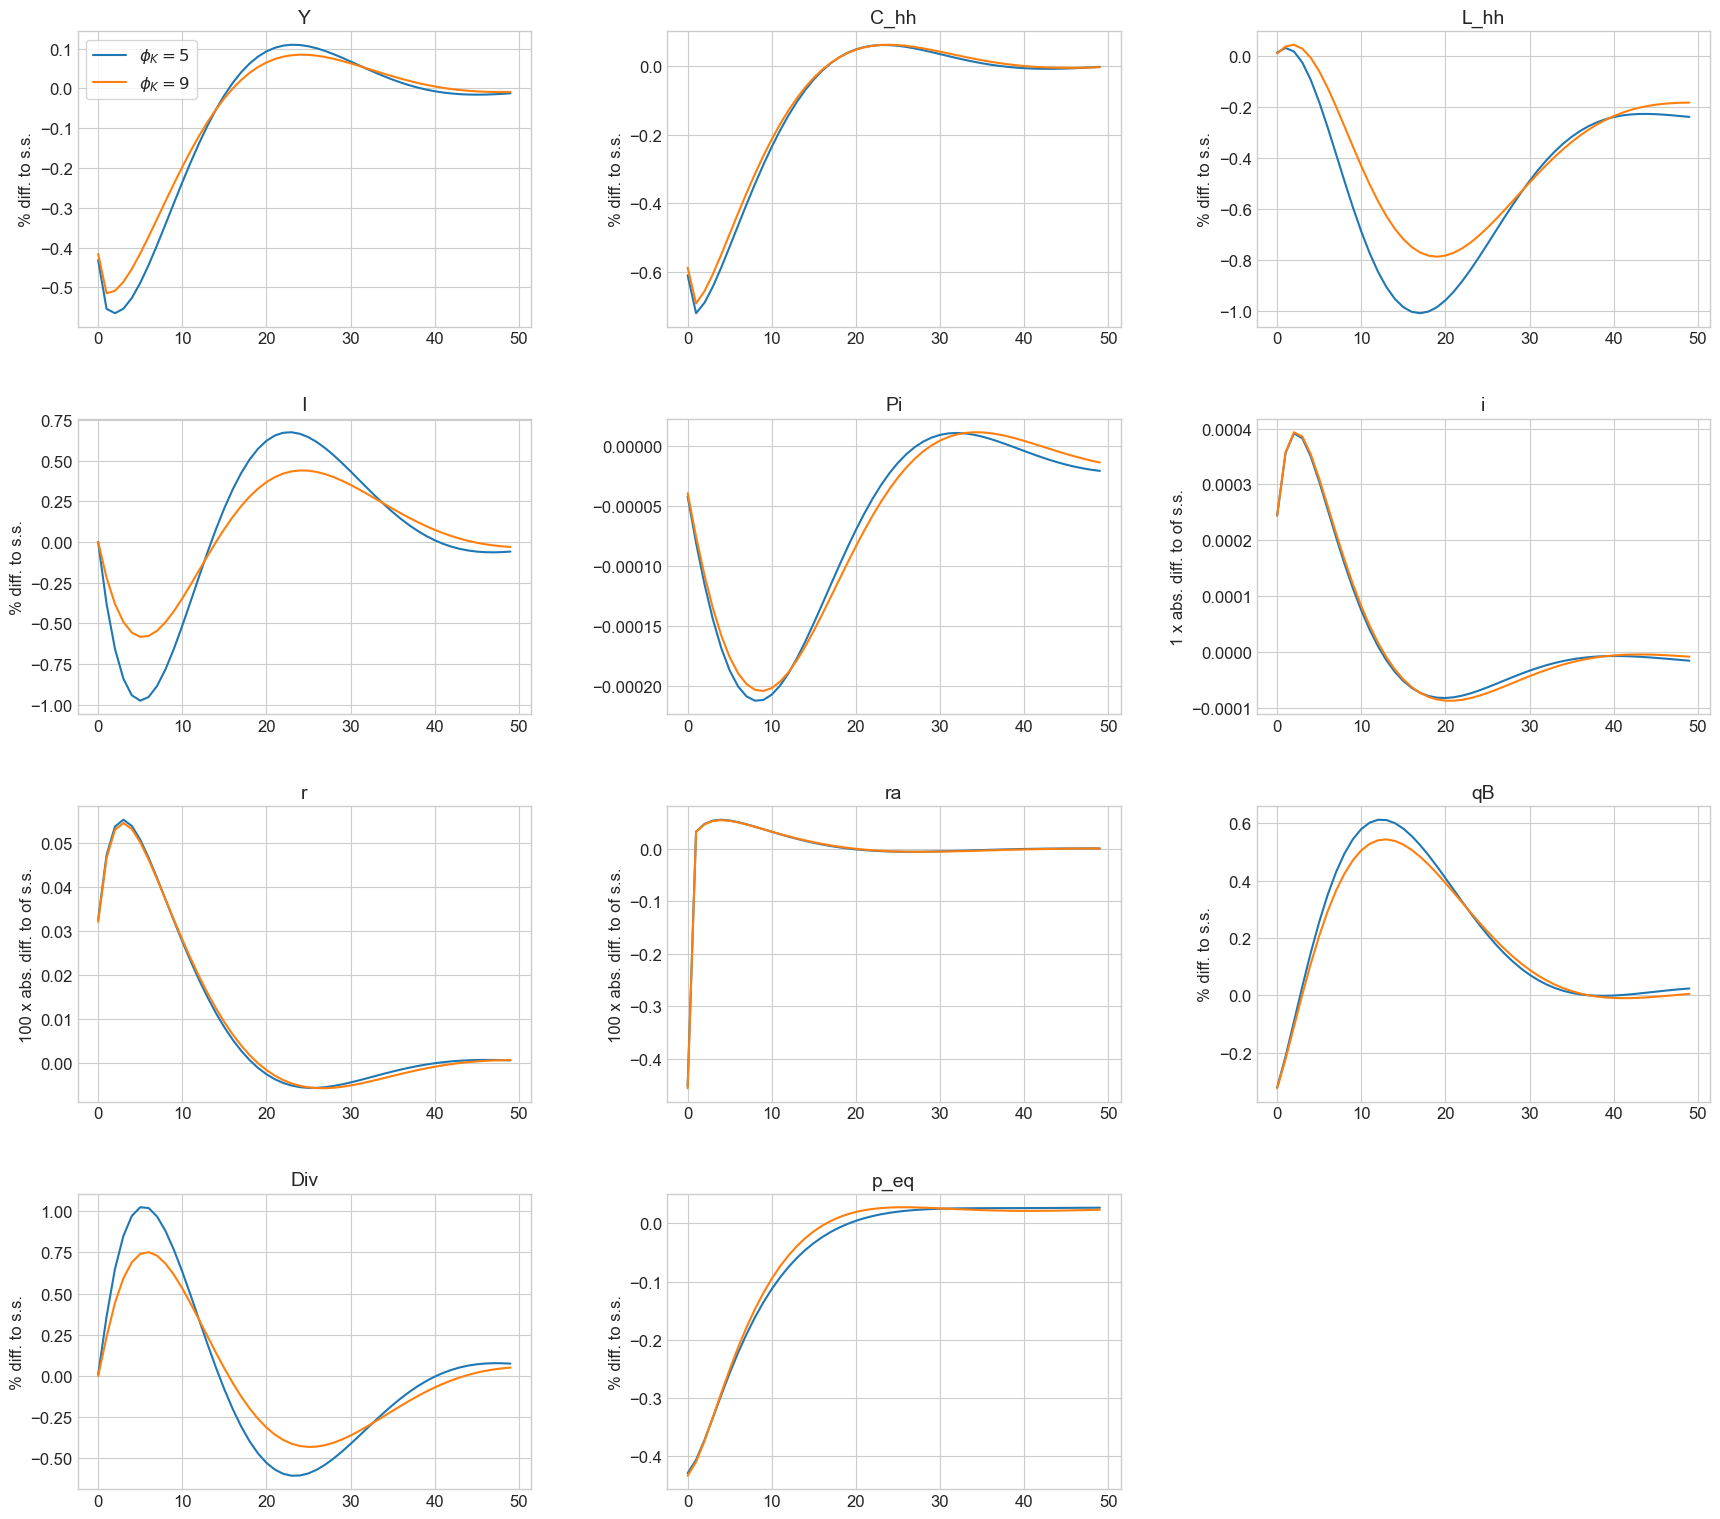

In [14]:
filename = os.path.join(path_images, 'inv_adj_costs_long')
paths = ['Y','C_hh', 'L_hh' ,'I',
         'Pi','i',
         'r','ra',
         'qB', 'Div', 'p_eq']
lvl_value = ['eg', 'em', 'i', 'Pi', 'psi']
abs_diff = ['r', 'ra', 'rl', 'i']
models_solved['baseline'].compare_IRFs(models_list, labels, paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=50, do_targets=False, filename=filename)

# MP Policy function

In [8]:
models['taylor_multiplicative'] = {'update_par': {
                'taylor': 'multiplicative'
            }}
models['taylor_simple'] = {'update_par': {
                'taylor': 'simple'
            }}
models['taylor_additive'] = {'update_par': {
                'taylor': 'additive'
            }}

In [14]:
compare_models = ['taylor_multiplicative', 'taylor_simple'] # , 'taylor_additive']
load_models = []
save_models = []

In [15]:
models_solved = solution_routine(compare_models)

Model: taylor_multiplicative
solved
Model: taylor_simple
solved


### shocks ###


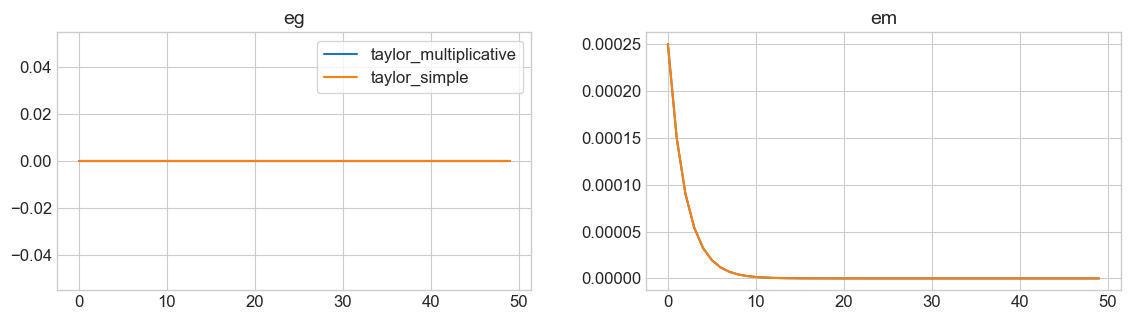


### varnames ###


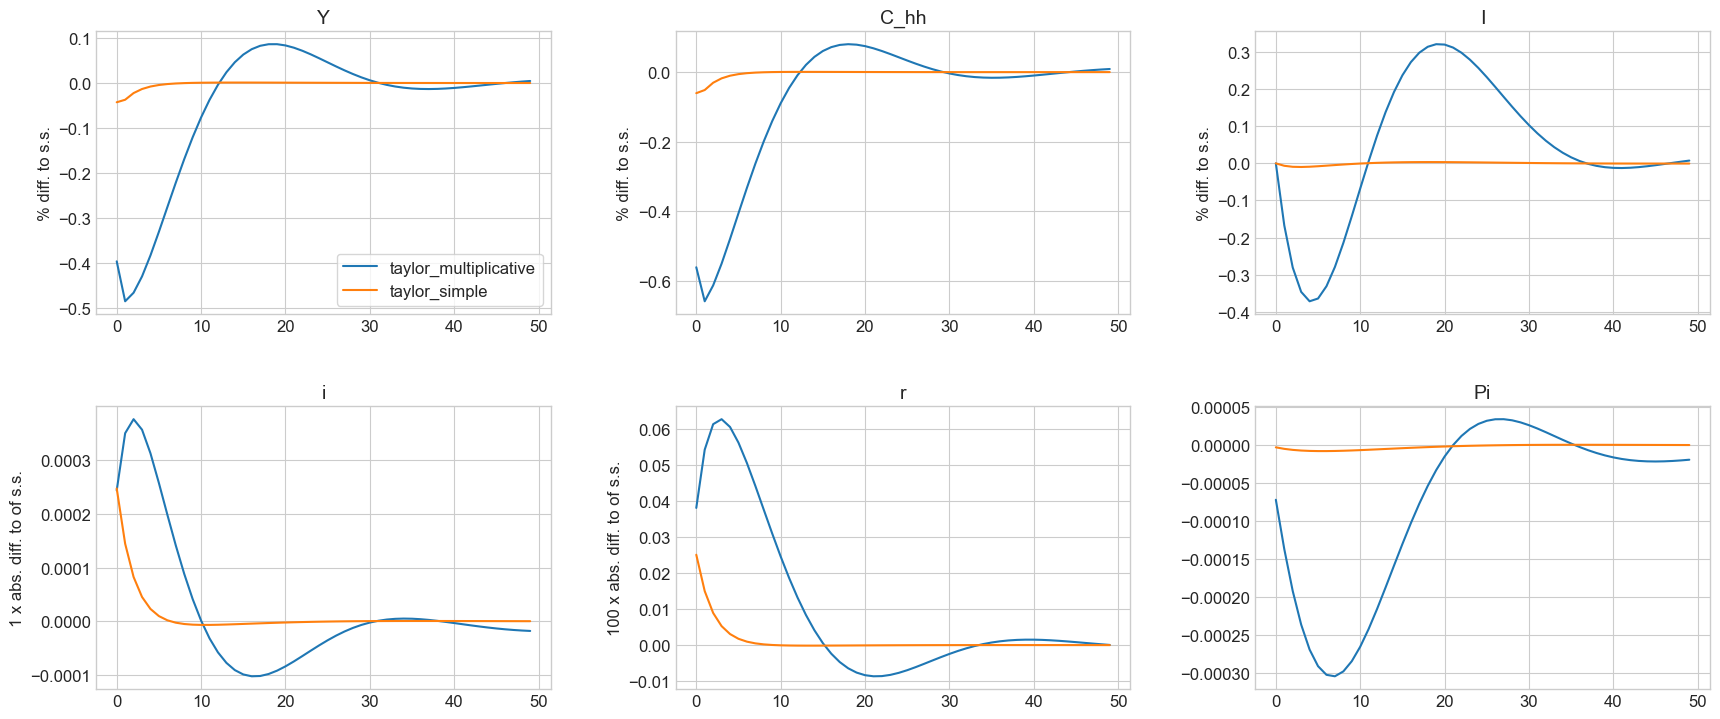

In [16]:
paths_MP = ['Y','C_hh','I','i','r','Pi']
filename = os.path.join(path_images, 'sensitivity_mp_functions')
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,do_targets=False,T_max=50, filename=filename)

# MP parameters

In [70]:
models['rho_m_06'] = {'update_par': {
                'rho_m': 0.6
            }}
models['rho_m_09'] = {'update_par': {
                'rho_m': 0.9
            }}
models['rho_m_075'] = {'update_par': {
                'rho_m': 0.75
            }}

In [71]:
compare_models = ['rho_m_06', 'rho_m_075', 'rho_m_09']
labels = [f'$\rho^m = 0.6$', f'$\rho^m = 0.75$', f'$\rho^m = 0.9$']

In [72]:
models_solved = solution_routine(compare_models)

Model: rho_m_05
model loaded
Model: rho_m_09
model loaded
Model: baseline
model loaded


### shocks ###


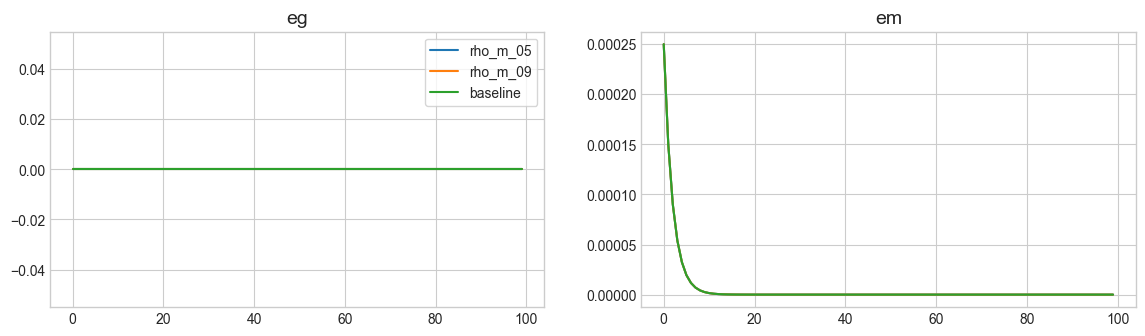


### varnames ###


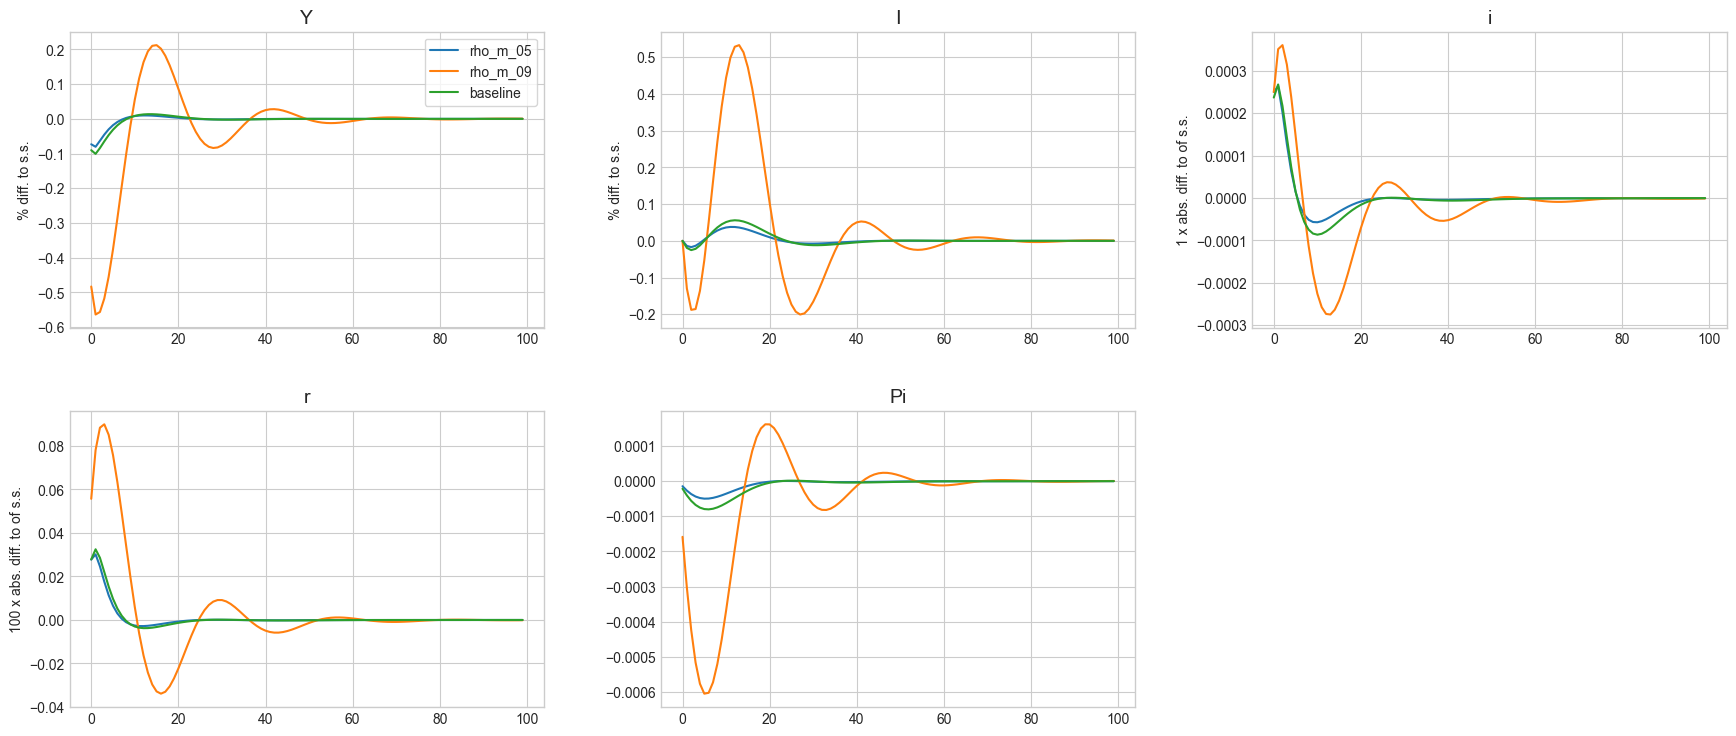


### tagets ###


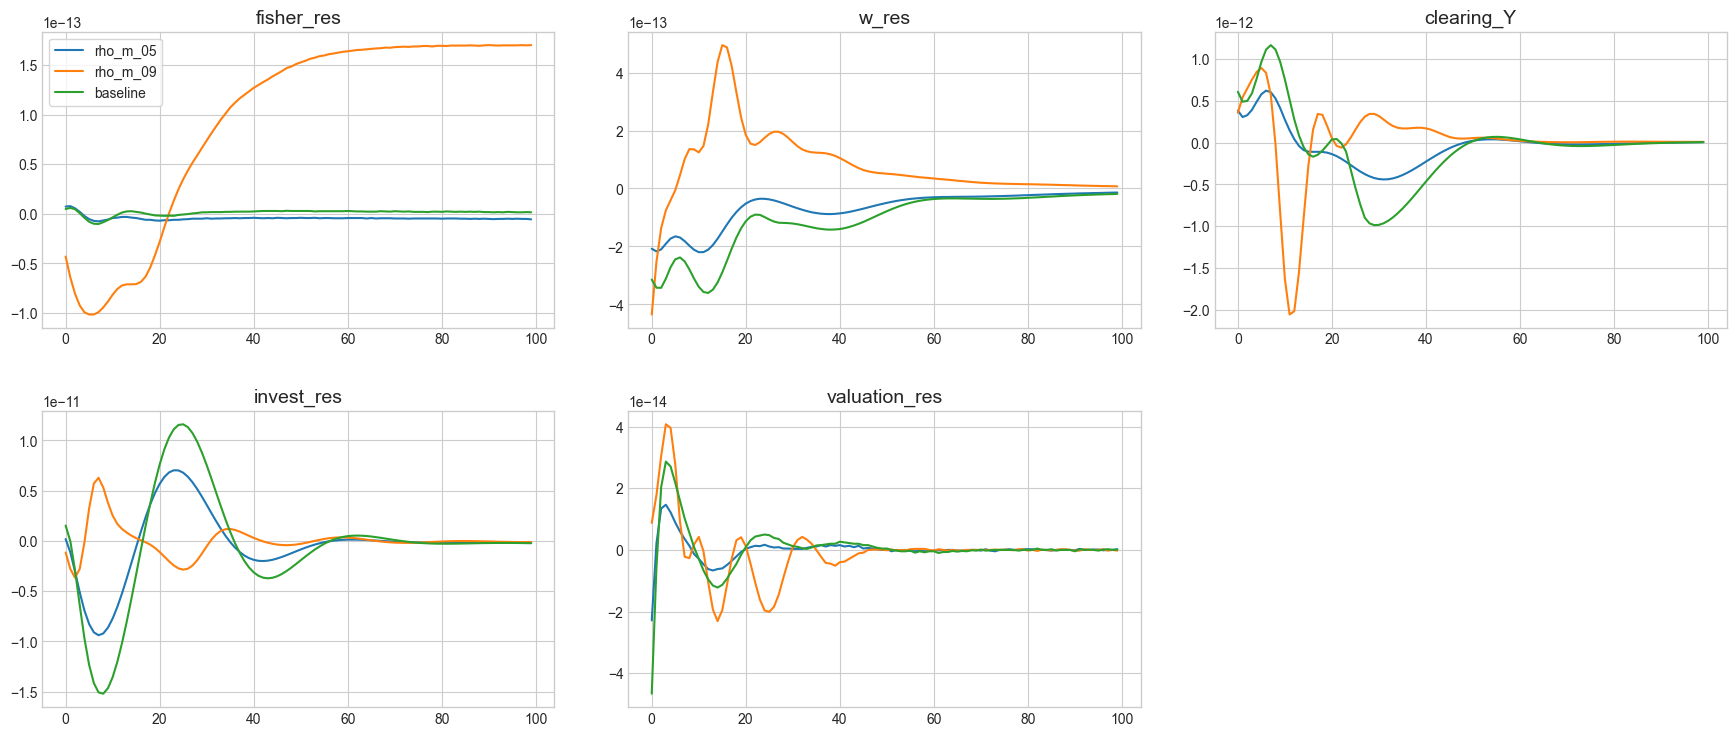

In [73]:
paths_MP = ['Y','C_hh','I','i','r','Pi']
filename = os.path.join(path_images, 'sensitivity_rho_m')
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,do_targets=False,T_max=50, filename=filename)

Inertia of policy rule is key for the investment response!
A strong reaction in the nominal interest rate leads to a less eratic movement in the real interest rate, which is a key part of determinining investments.

## taylor rule coefficient phi_pi

In [35]:
models['phi_pi_11'] = {'update_par': {
                'phi_pi': 1.1
            }}
models['phi_pi_125'] = {'update_par': {
                'phi_pi': 1.25
            }}
models['phi_pi_15'] = {'update_par': {
                'phi_pi': 1.5
            }}
models['phi_pi_2'] = {'update_par': {
                'phi_pi': 2
            }}

In [36]:
compare_models = ['phi_pi_11', 'phi_pi_125', 'phi_pi_15', 'phi_pi_2']
labels = [f'$\phi_pi = 1.1$', f'$\phi_pi = 1.25$', f'$\phi_pi = 1.5$', f'$\phi_pi = 2.0$']

In [ ]:
models_solved = solution_routine(compare_models)

Model: phi_pi_11
solved
Model: phi_pi_125
solved
Model: phi_pi_15


In [ ]:
paths_MP = ['Y','C_hh','I','i','r','Pi']
models_list = []
filename = os.path.join(path_images, 'sensitivity_phi_p')
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,do_targets=False,T_max=50, filename=filename)

# Stickyness parameters
## Price sticykness

In [78]:
models['xi_p_098'] = {'update_par': {
                'xi_p': 0.98
            }}
models['xi_p_09'] = {'update_par': {
                'xi_p': 0.9
            }}
models['xi_p_08'] = {'update_par': {
                'xi_p': 0.8
            }}

In [79]:
compare_models = ['xi_p_08', 'xi_p_09', 'xi_p_098']
labels = [f'$xi_p = 0.8$', f'$$xi_p = 0.9$', f'$$xi_p = 0.98$']

In [80]:
models_solved = solution_routine(compare_models)

Model: baseline
model loaded
Model: xi_p_098
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
Div_int: terminal value is   0.05660173, but ss value is   0.05660377
Div_k: terminal value is   0.02736749, but ss value is   0.02736708
Div: terminal value is   0.08396922, but ss value is   0.08397086
L: terminal value is   0.23000245, but ss value is   0.23000000
Pi_w_increase: terminal value is   0.00000005, but ss value is   0.00000000
Pi_w: terminal value is   0.00000008, but ss value is   0.00000000
Pi: terminal value is   0.00000003, but ss value is   0.00000000
L_hh: terminal value is   0.23000245, but ss value is   0.23000000
solved
saved
Model: xi_p_08
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.000

### shocks ###


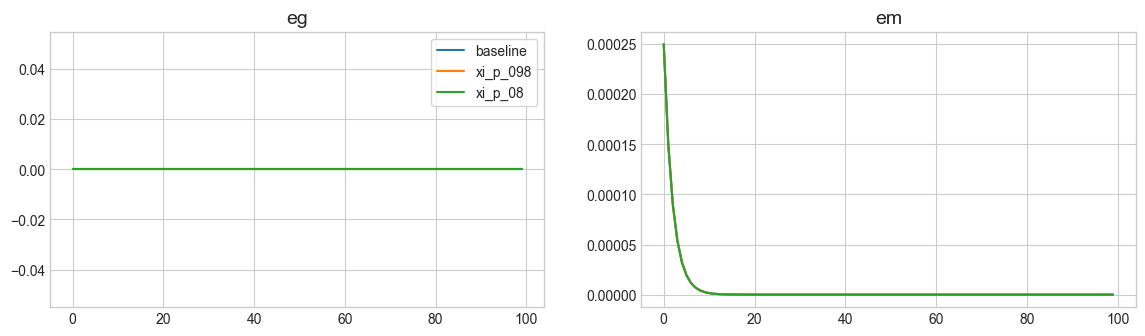


### varnames ###


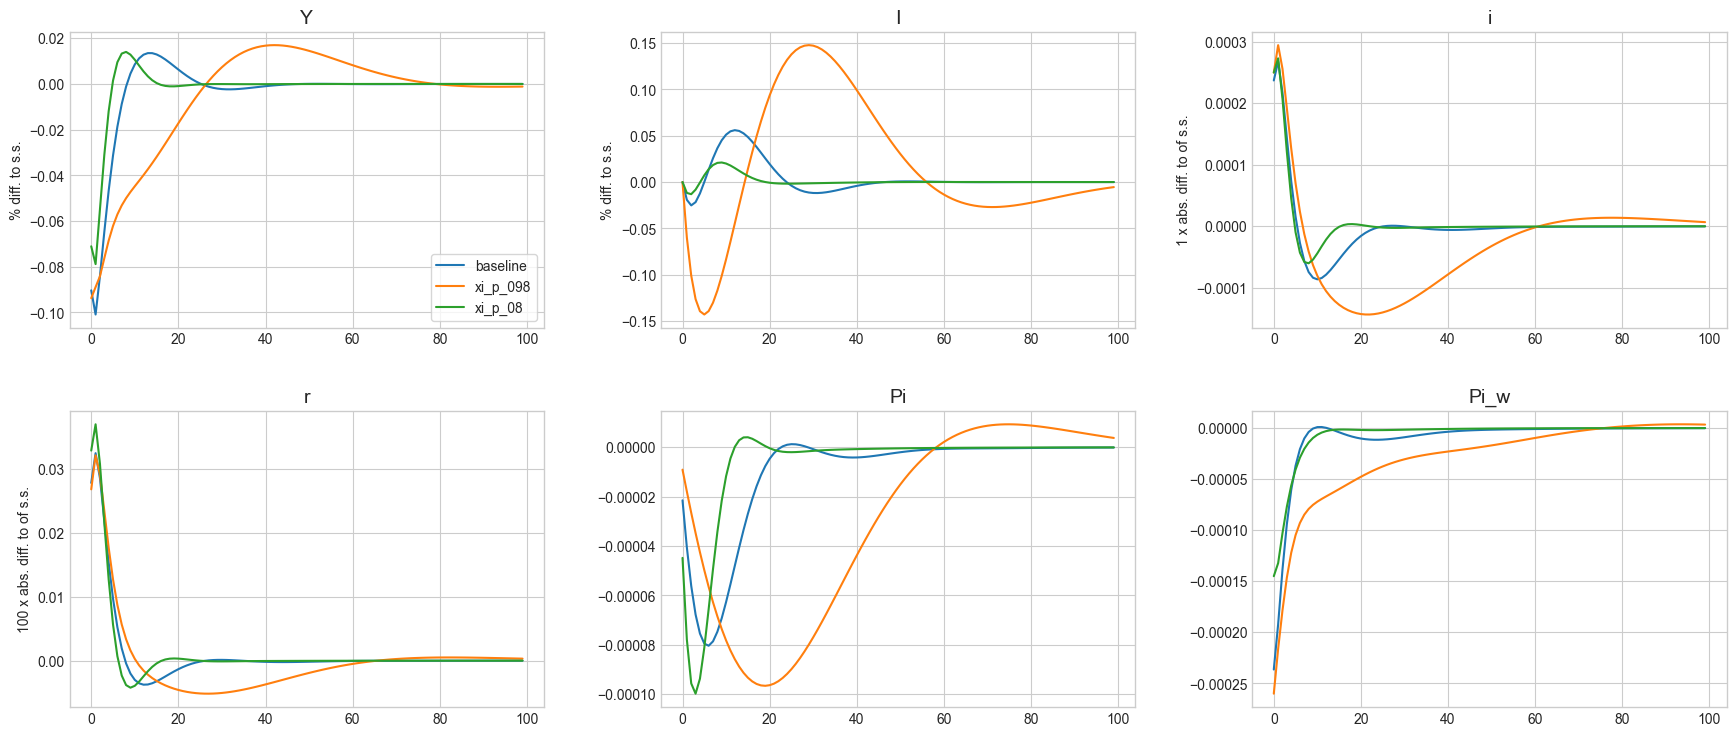


### tagets ###


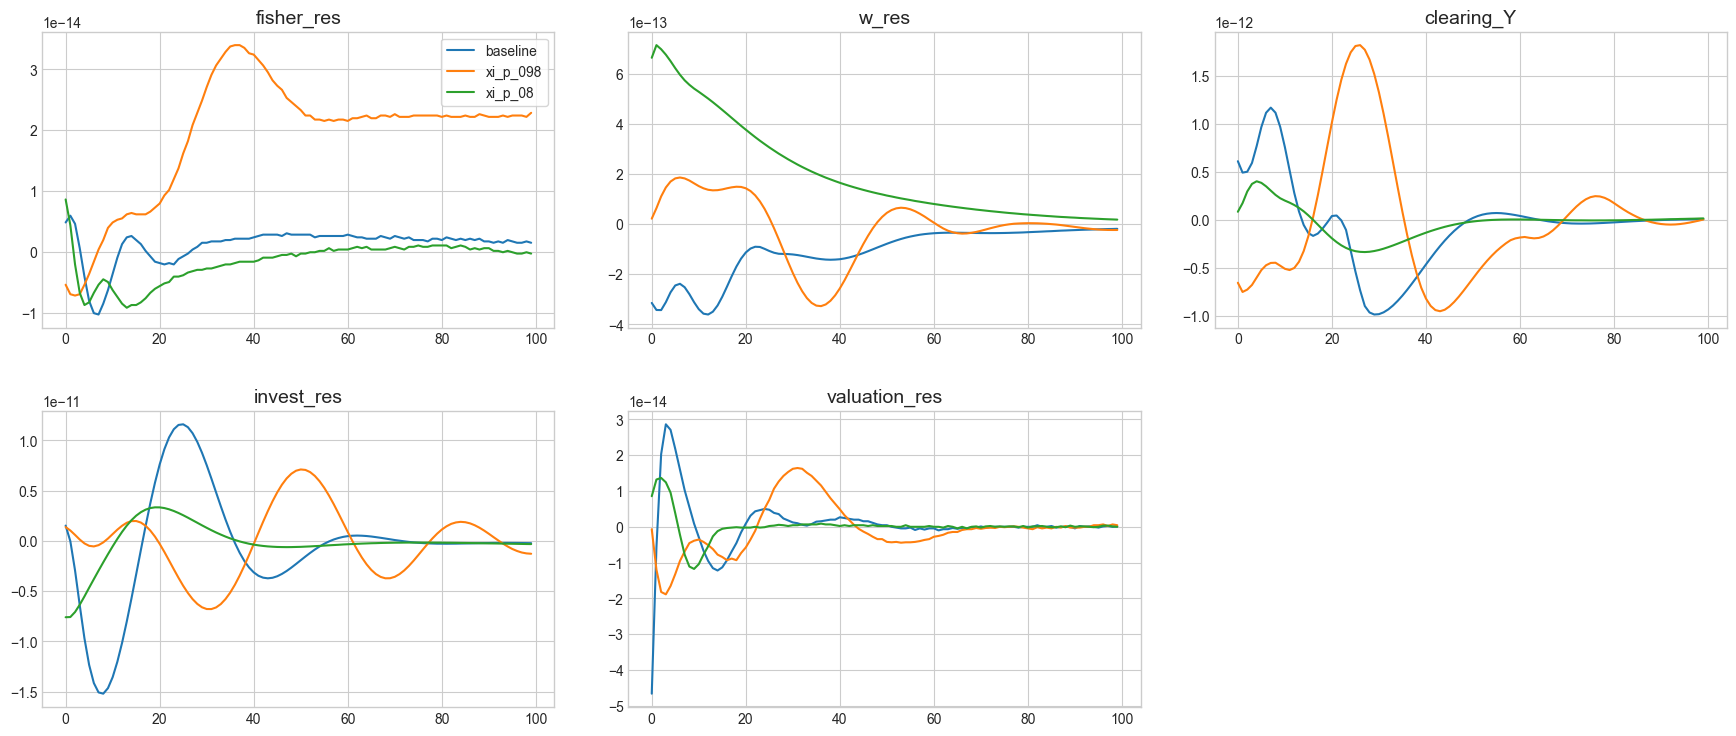

In [81]:
paths_MP = ['Y','C_hh','I','i','r','Pi', 'Pi_w']
models_list = []
filename = os.path.join(path_images, 'sensitivity_xi_p')
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,do_targets=False,ncols=3,T_max=50,filename=filename)

## Wage sticykness

In [7]:
models['xi_w_095'] = {'update_par': {
                'xi_w': 0.98
            }}
models['xi_w_085'] = {'update_par': {
                'xi_w': 0.8
            }}
models['xi_w_09'] = {'update_par': {
                'xi_w': 0.9
            }}

In [8]:
compare_models = ['xi_w_095', 'xi_w_09' ,'xi_w_085']
labels = [f'$xi_w = 0.95$', f'$xi_w = 0.9$', f'$xi_w = 0.85$']

In [9]:
models_solved = solution_routine(compare_models)

Model: xi_w_095
solved
Model: xi_w_085
solved


### shocks ###


C:\Users\Yannik\Meine Ablage\Uni\Master\Master Thesis\Thesis_Code\Hump_Jump_Replication\GEModelTools\figures.py:123: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


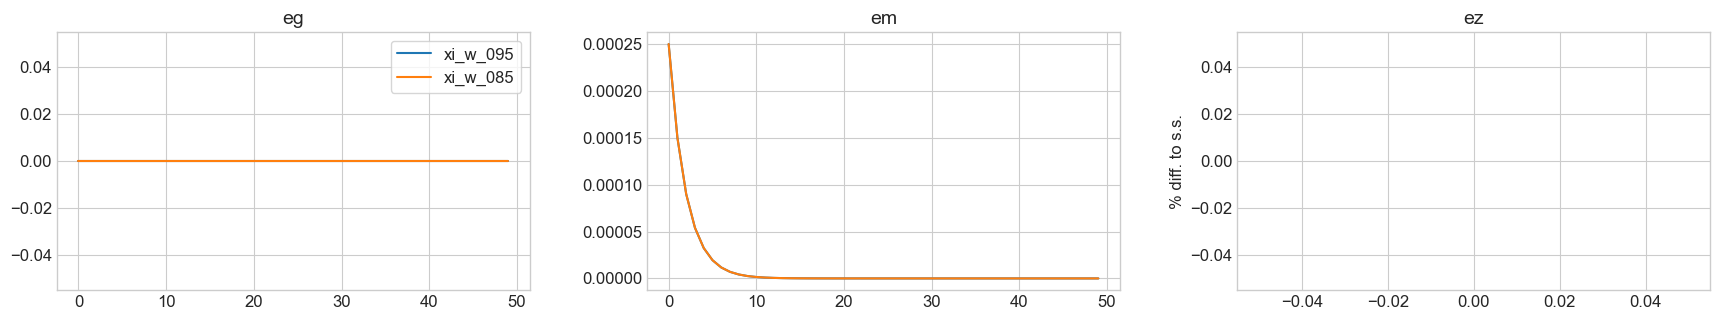


### varnames ###


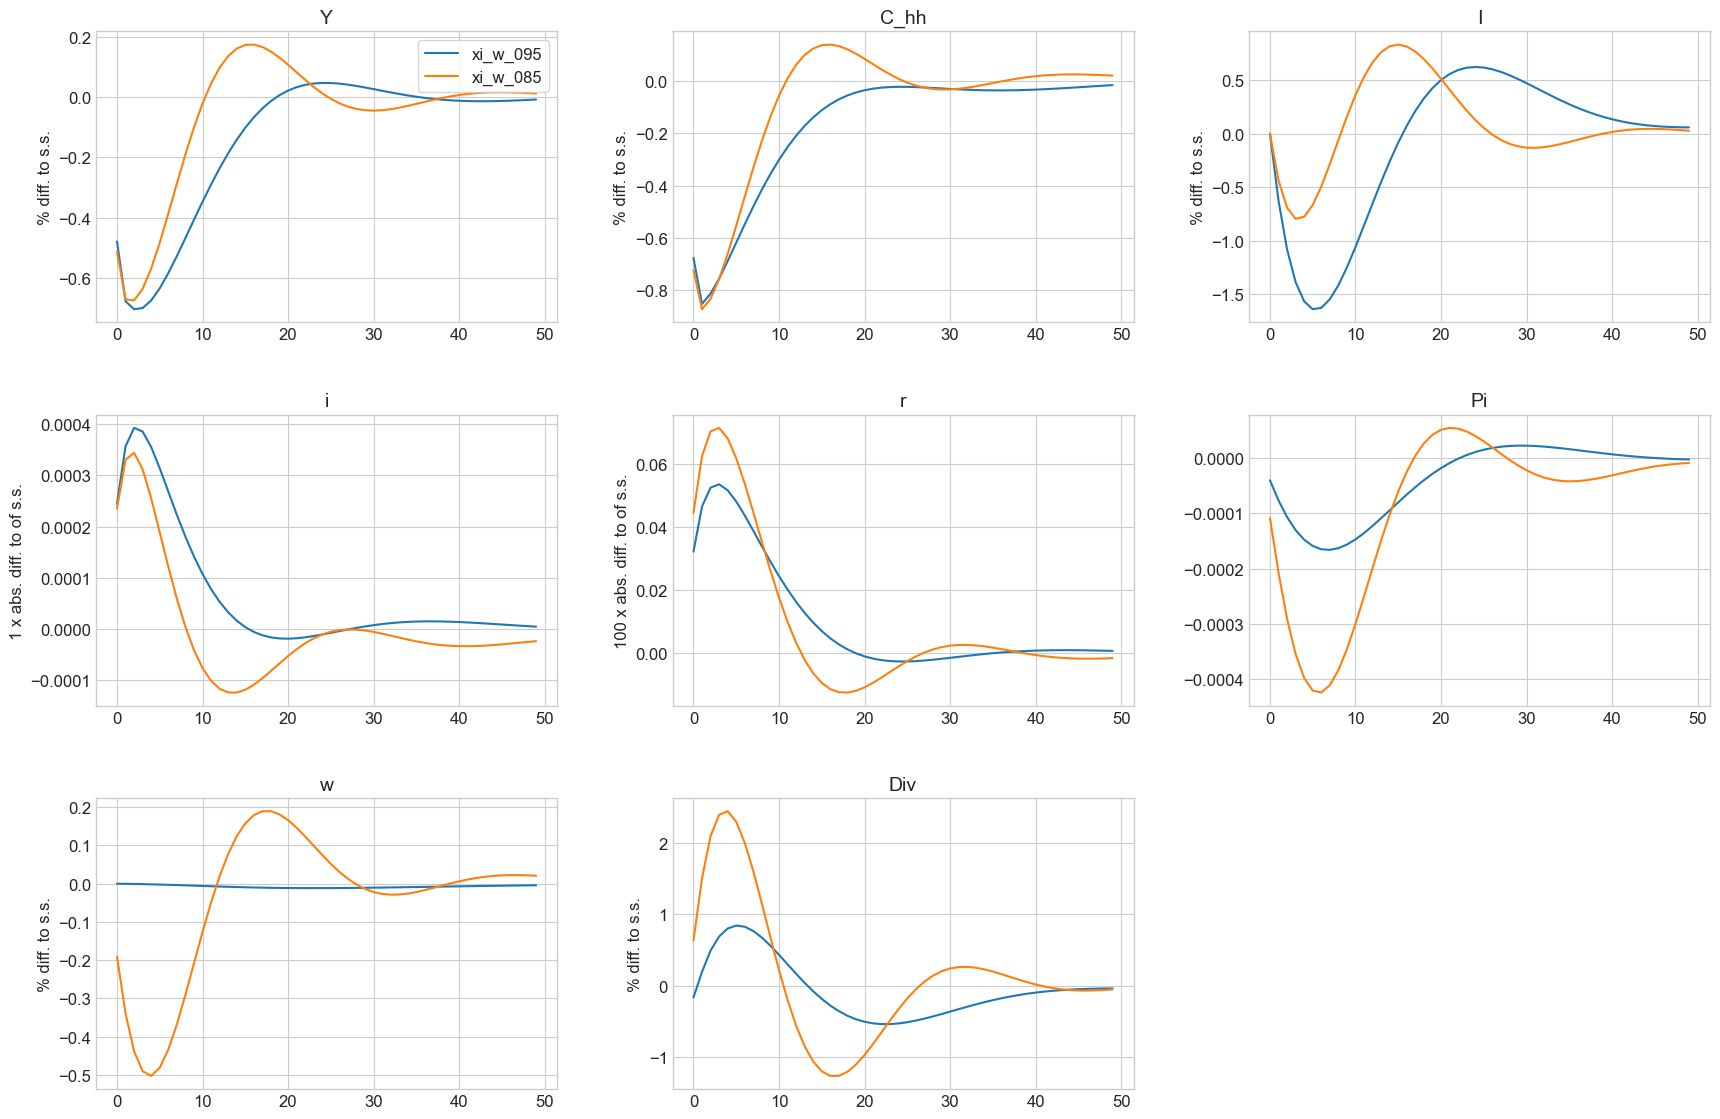

In [11]:
paths_MP = ['Y','C_hh','I','i','r','Pi', 'w', 'Div']
models_list = []
filename = os.path.join(path_images, 'sensitivity_xi_w')
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=50,do_targets=False,filename=filename)

## Kimball superelasticity
### $v_p$

In [83]:
models['v_p_0'] = {'update_par': {
                'v_p': 0.0
            }}
models['v_p_10'] = {'update_par': {
                'v_p': 10.0
            }}
models['v_p_20'] = {'update_par': {
                'v_p': 20.0
            }}
models['v_p_40'] = {'update_par': {
                'v_p': 40.0
            }}

In [84]:
compare_models = ['v_p_0', 'v_p_10', 'v_p_20', 'v_p_40']
labels = ['v_p = 0', 'v_p = 10', 'v_p = 20', 'v_p = 40']

In [85]:
models_solved = solution_routine(compare_models)

Model: baseline
model loaded
Model: xi_w_095
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved
Model: xi_w_085
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved


### shocks ###


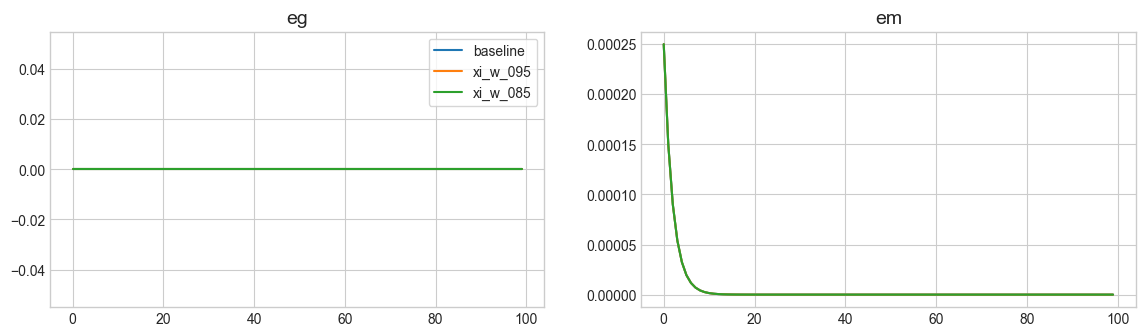


### varnames ###


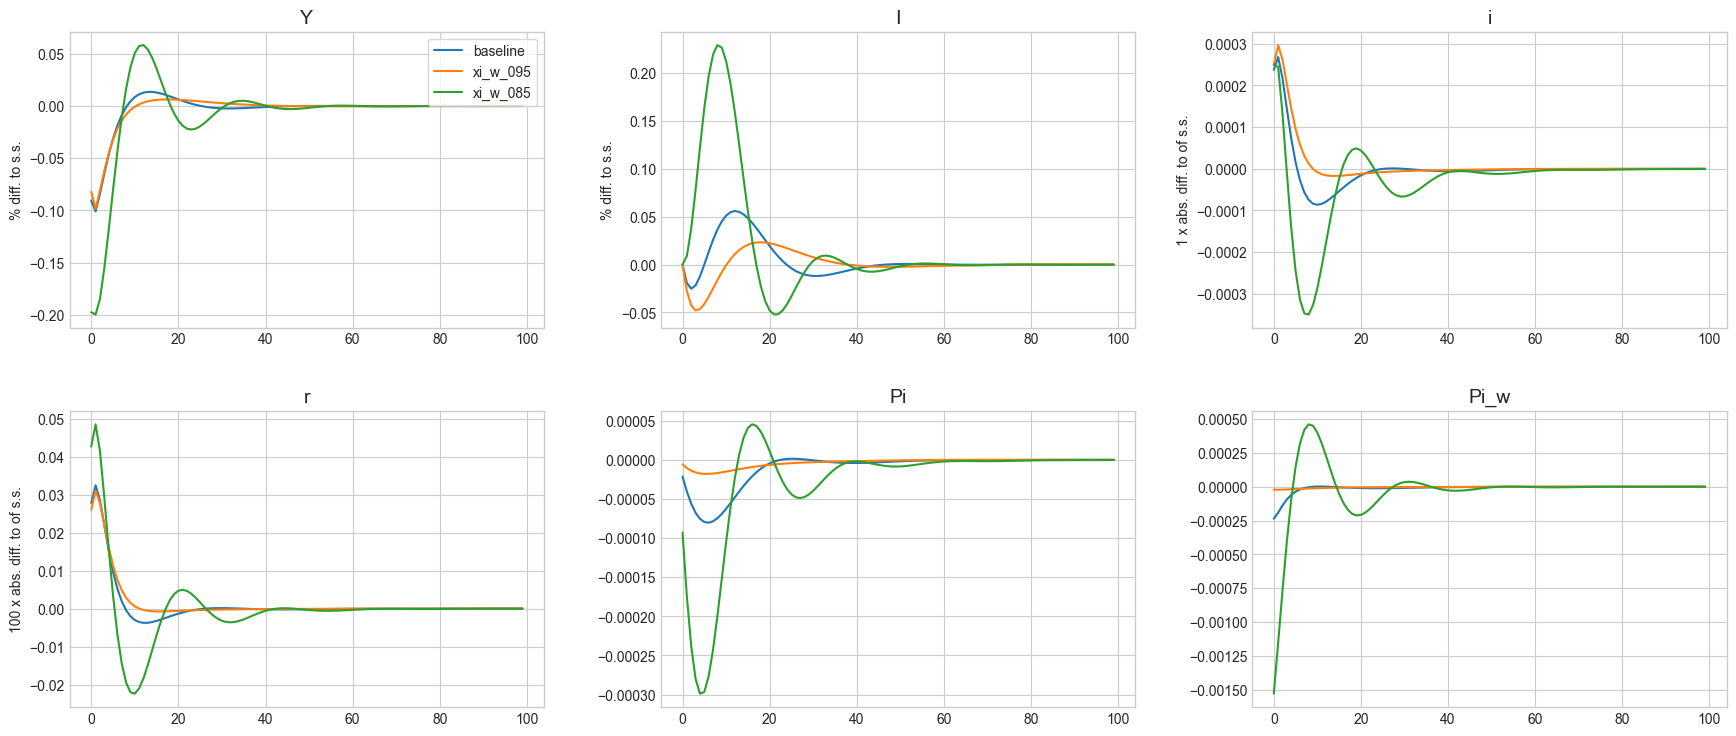


### tagets ###


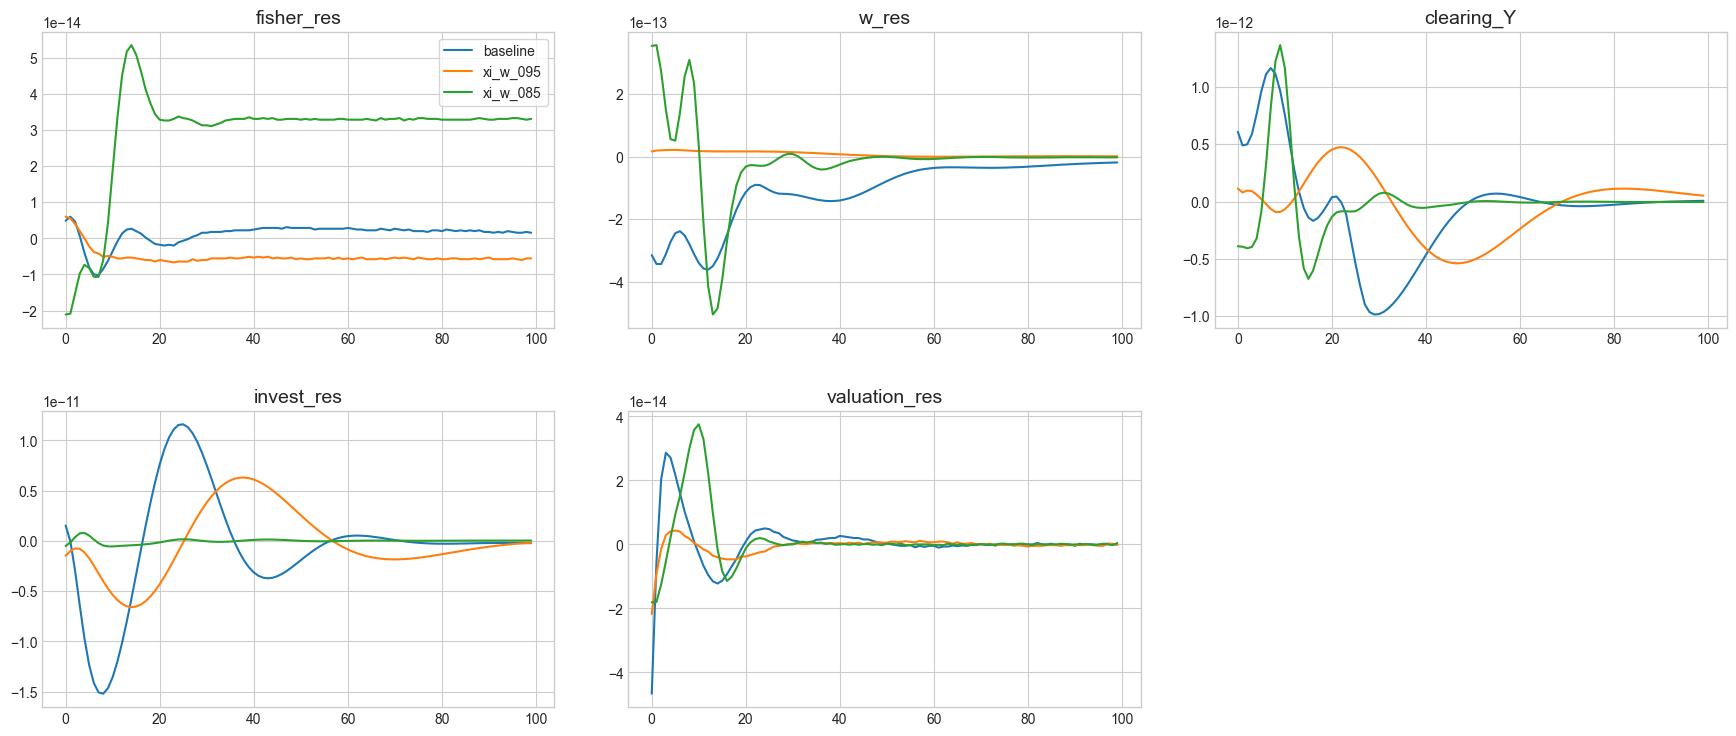

In [86]:
paths_MP = ['Y','C_hh','I','i','r','Pi', 'Pi_w']
models_list = []
filename = os.path.join(path_images, 'sensitivity_v_p')
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=50,do_targets=False,filename=filename)

### $v_w$

In [83]:
models['v_w_0'] = {'update_par': {
                'v_w': 0.0
            }}
models['v_w_10'] = {'update_par': {
                'v_w': 10.0
            }}
models['v_w_20'] = {'update_par': {
                'v_w': 20.0
            }}
models['v_w_40'] = {'update_par': {
                'v_w': 40.0
            }}

In [84]:
compare_models = ['v_w_0', 'v_w_10', 'v_w_20', 'v_w_40']
labels = ['v_w = 0', 'v_w = 10', 'v_w = 20', 'v_w = 40']

In [85]:
models_solved = solution_routine(compare_models)

Model: baseline
model loaded
Model: xi_w_095
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved
Model: xi_w_085
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved


### shocks ###


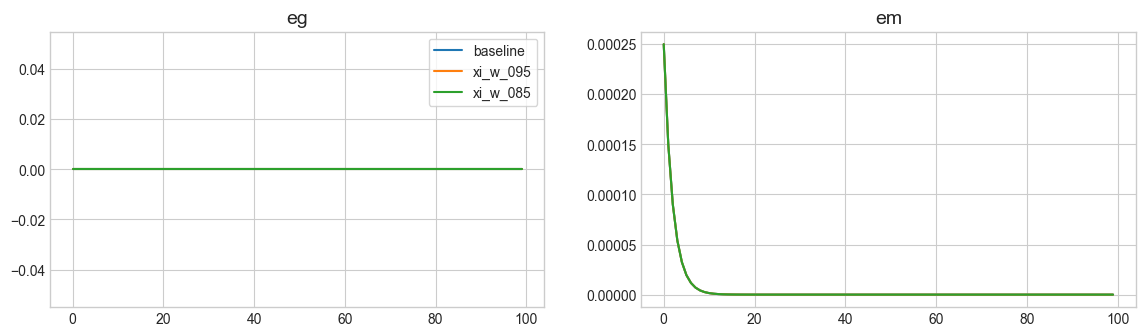


### varnames ###


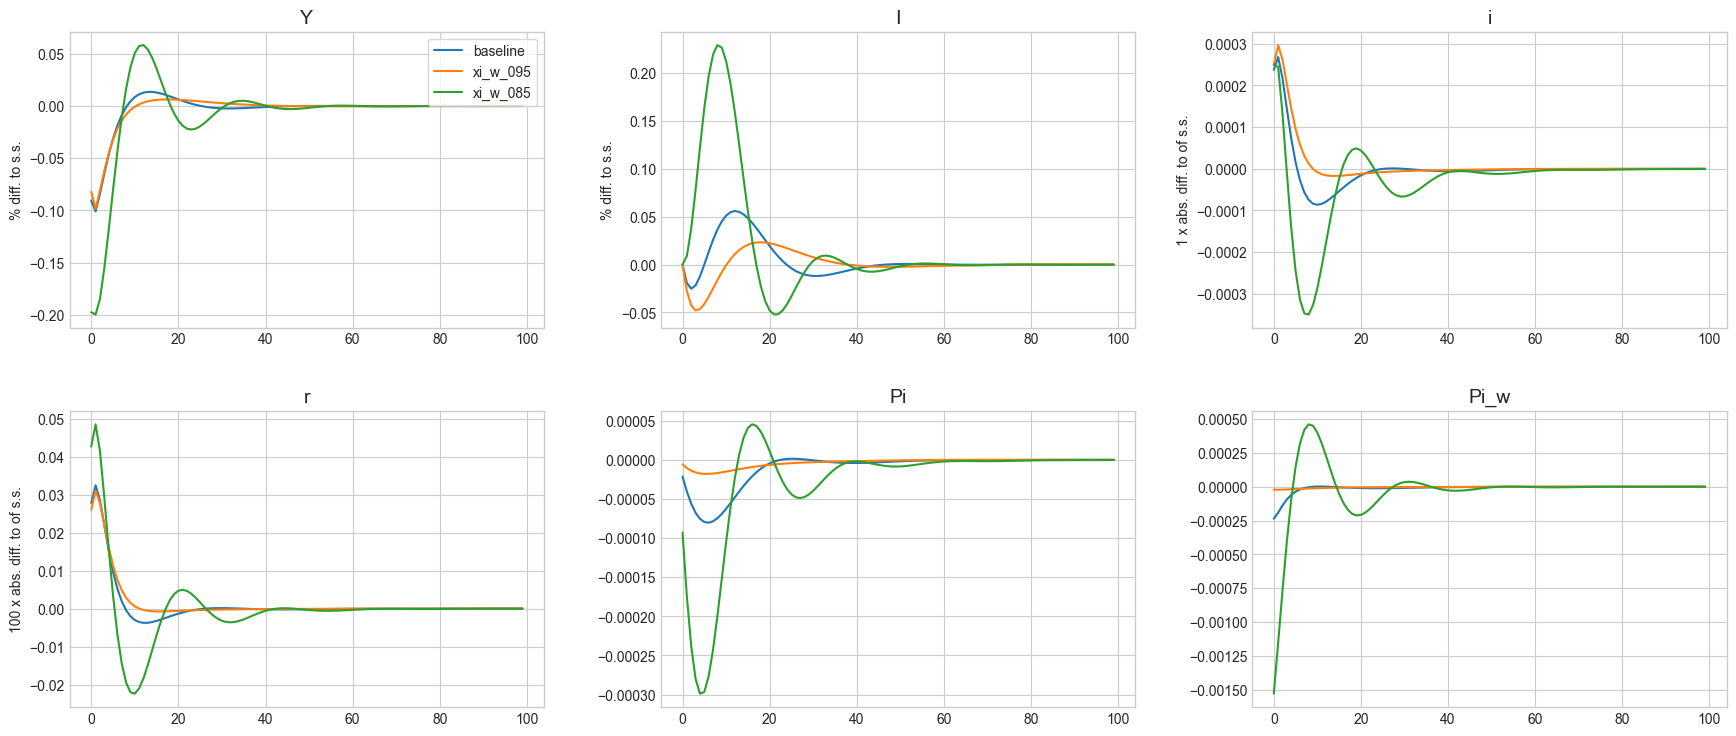


### tagets ###


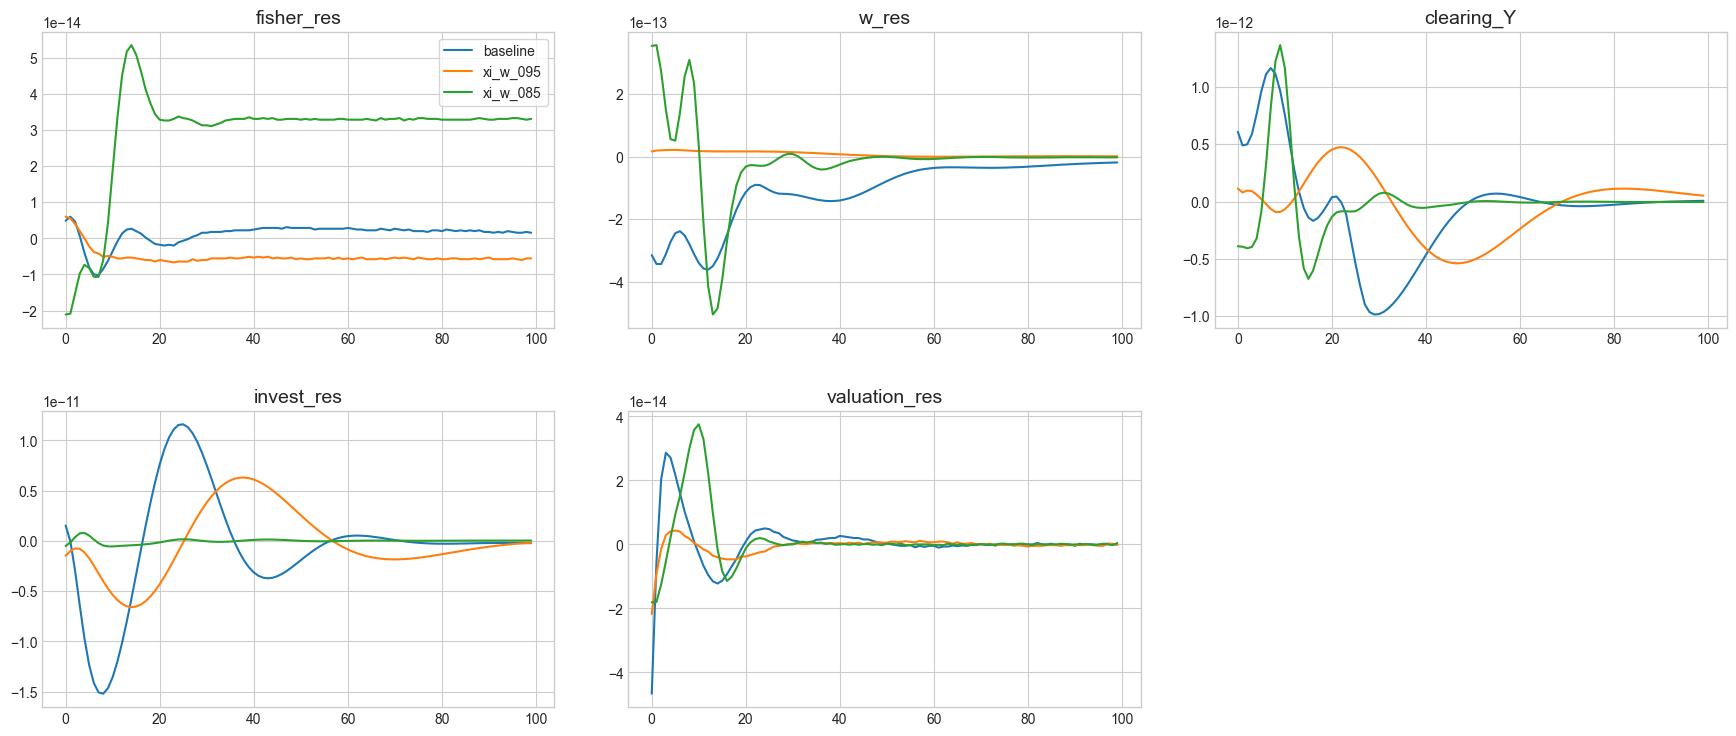

In [86]:
paths_MP = ['Y','C_hh','I','i','r','Pi', 'Pi_w']
models_list = []
filename = os.path.join(path_images, 'sensitivity_v_w')
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=50,do_targets=False,filename=filename)

# Tax adjustment speed

In [83]:
models['phi_tau_0025'] = {'update_par': {
                'phi_tau': 0.025
            }}
models['phi_tau_01'] = {'update_par': {
                'phi_tau': 0.1
            }}
models['phi_tau_04'] = {'update_par': {
                'phi_tau': 0.4
            }}

In [84]:
compare_models = ['phi_tau_0025', 'phi_tau_01', 'phi_tau_04']
labels = ['phi_tau = 0.025', 'phi_tau = 0.1', 'phi_tau = 0.4']

In [85]:
models_solved = solution_routine(compare_models)

Model: baseline
model loaded
Model: xi_w_095
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved
Model: xi_w_085
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved


### shocks ###


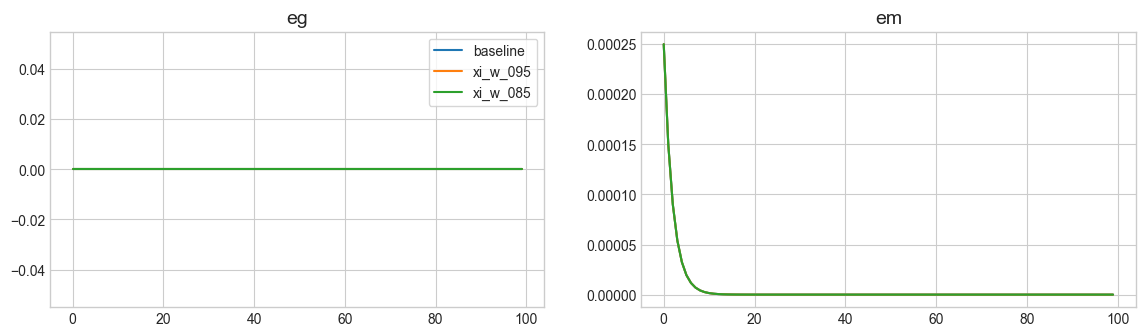


### varnames ###


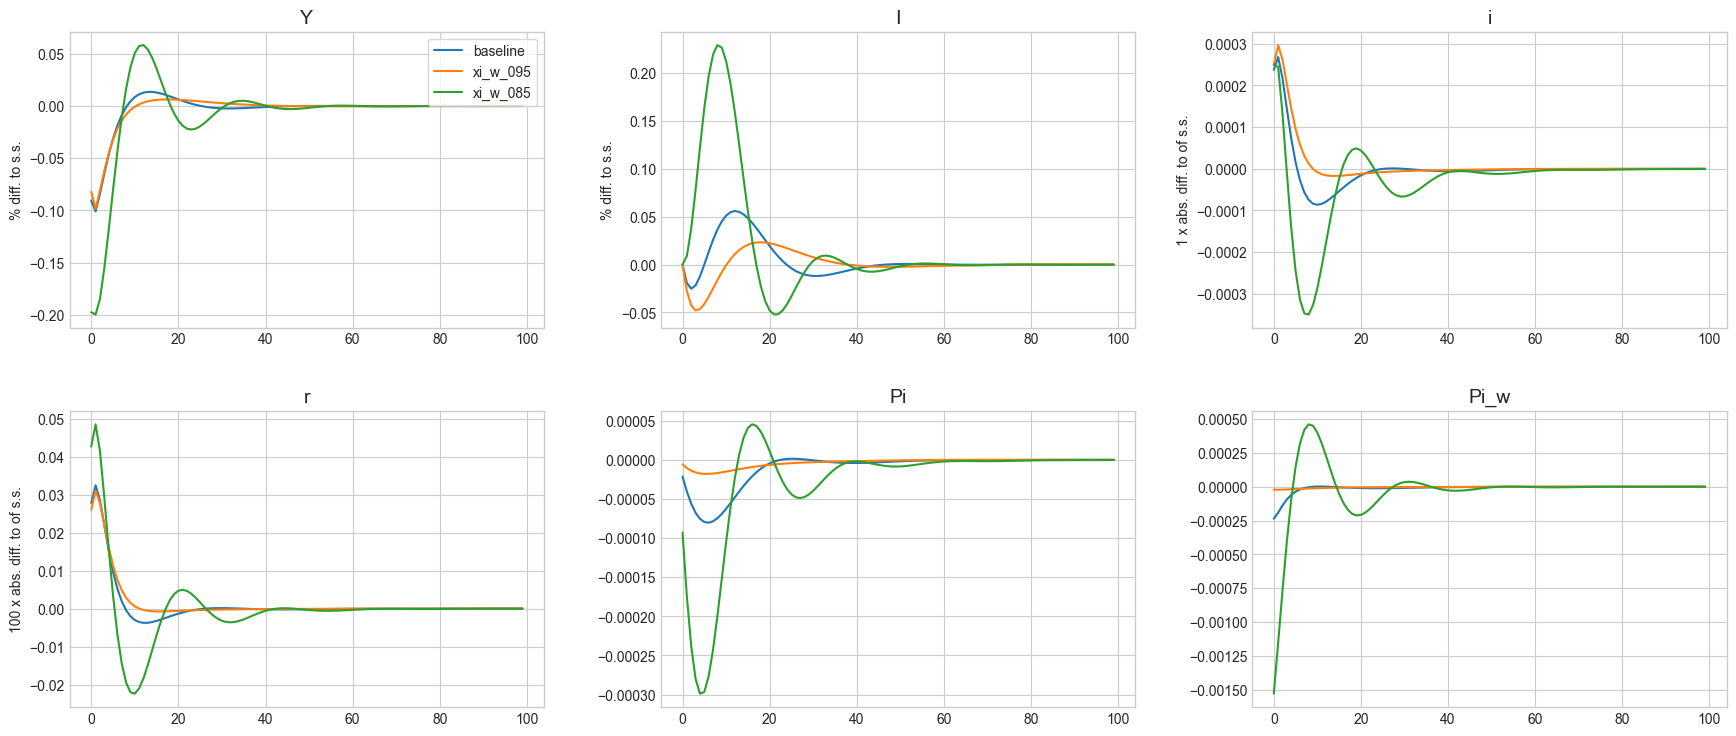


### tagets ###


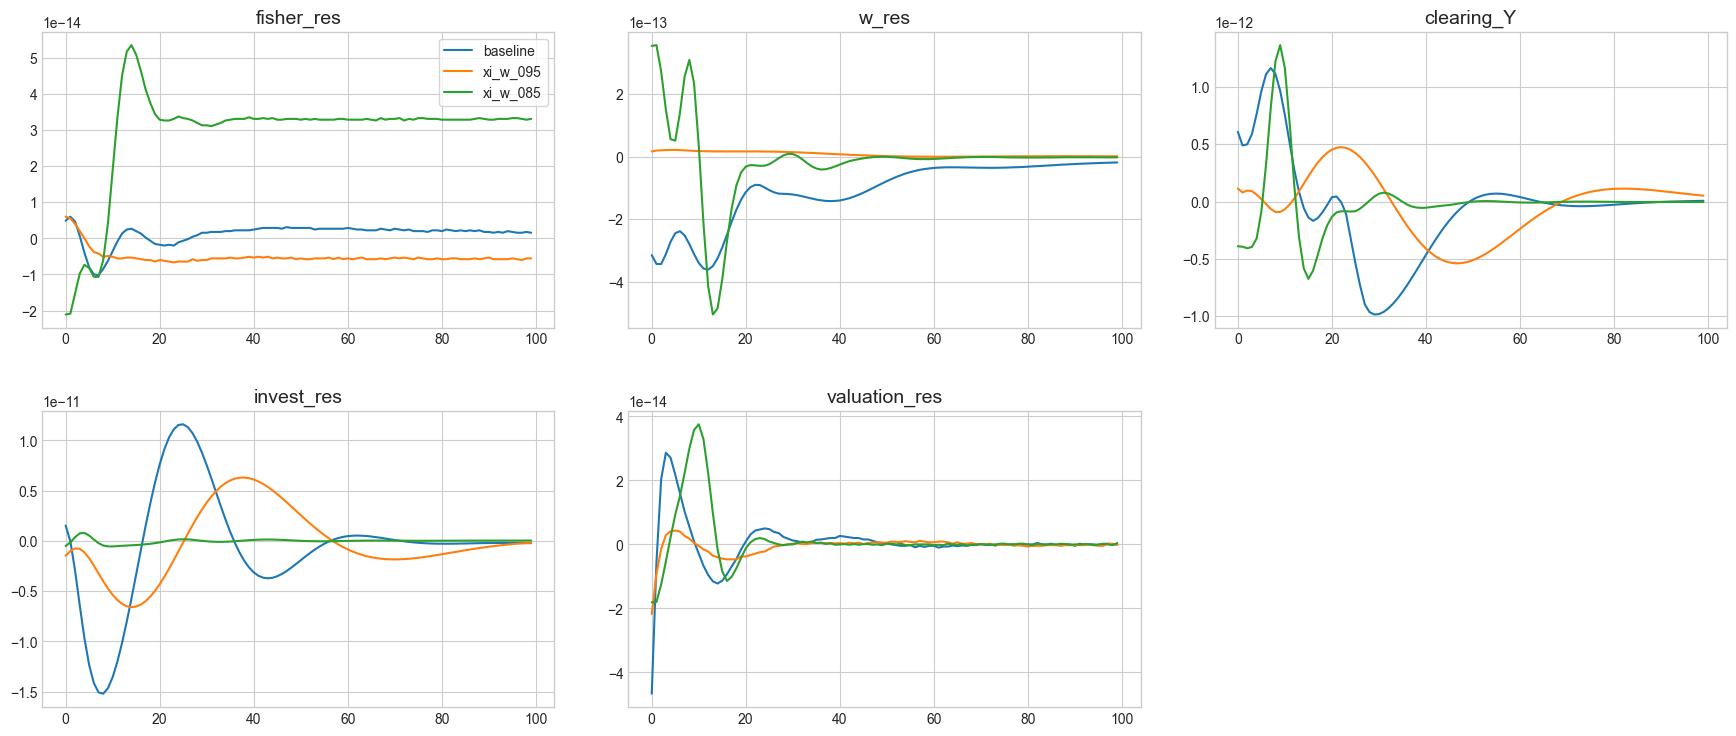

In [86]:
paths_MP = ['Y','C_hh','I','i','r','Pi', 'Pi_w']
models_list = []
filename = os.path.join(path_images, 'sensitivity_phi_tau')
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=50,do_targets=False,filename=filename)